# Getting Started

In this notebook, we're going to explore all basic features of the `siamese` package.

For mode informations, check the main repository at https://github.com/GusFurtado/siamese-optimizer.

### Importing the package

Let's start by importing the basic objects. A line is made up by:
- The `Source` object that creates entities;
- The `Machine` object that processes/holds entities;
- The `Buffer` object that stores entities in-between machines;
- And the `Line` object that wraps everything.

In [1]:
from siamese import (
    Source,
    Buffer,
    Machine,
    Line
)

Also important are some of the support objects.

Instead of simulating constant values, we can work with random statistics distributions by importing the `distributions` submodule.

There are currently 10 distinct distributions available. Let's import some of them:

In [2]:
from siamese.distributions import (
    Exponential,
    Triangular,
    Gamma,
    Uniform
)

And the `failure` submodule contains the objects that defines a `Model` failure behavior.

- `TimeFailure`: Breaks a `Model` after some time.
- `CountFailure`: Break a `Model` after a number of entities is processed *(Not yet implemented)*.

In [3]:
from siamese.failures import TimeFailure

### Creating the source

In this step, we'll create every component of out line.

Let's start with the `Source`. Give it a distinct name and set its processing time, output buffer and failure behavior.

- `processing_time`: The time it takes to create a new entity.
- `output_buffer`: Name of the buffer the new entity will be stored.
- `failure`: How often the `Model` breaks and how long it takes to fix it.

In [4]:
our_source = Source(
    name = 'our_source',
    processing_time = Exponential(mean=10, min=5),
    output_buffer = 'buffer1',
    failure = TimeFailure(
        time_between_failures = Gamma(shape=2, scale=10),
        time_to_repair = Gamma(shape=3, scale=2)
    )
)

**Notes:**

We can use the distributions to set the value of the `processing_time`, `time_between_failures` and `time_to_repair`.

There are only a couple rules you need to follow when naming your `Model`:
- The `name` must be distinct from any other object `name`;
- No special characters. This `name` will be set as an attribute of the `Model`.


### Creating the machines

Let's add two machines to out line.

`Machines` follow the same rules of `Sources`, but they have and extra argument: `input_buffer`. This is the place where our machines will get their entities to be processed.

In [5]:
first_machine = Machine(
    name = 'first_machine',
    processing_time = Triangular(min=5, mode=10, max=15),
    input_buffer = 'buffer1',
    output_buffer = 'buffer2',
    failure = TimeFailure(
        time_between_failures = Gamma(shape=1, scale=30),
        time_to_repair = Gamma(shape=1, scale=15)
    )
)

second_machine = Machine(
    name = 'second_machine',
    processing_time = Triangular(min=1, mode=11, max=25),
    input_buffer = 'buffer2',
    output_buffer = 'sink',
    failure = TimeFailure(
        time_between_failures = Uniform(min=5, max=10),
        time_to_repair = Uniform(min=1, max=2)
    )
)

### Creating buffers

Now we need to add the buffers between machines. These are the places where the entities will be stored before and after processing.

We already reference their names in the previous steps, so make sure these names match.

In [6]:
buffer1 = Buffer(
    name = 'buffer1',
    capacity = 20
)

buffer2 = Buffer(
    name = 'buffer2',
    capacity = 20
)

sink = Buffer(
    name = 'sink',
    capacity = 200
)

The `capacity` argument is the maximum amount of entities that can be held at once in this object.

### Wrapping everything up in a line

After creating our `Models`, we need to feed them to a `Line` object. No shenanigans, just dump them in the `*args`.

In [7]:
line = Line(
    our_source,
    first_machine,
    second_machine,
    buffer1,
    buffer2
)

Alternatively, use the method `add_model`.

In [8]:
line.add_model(
    model = sink
)

And let's take a look at our gourgeous completed production line.

Legend
------
(1) our_source
(2) first_machine
(3) second_machine
(4) buffer1
(5) buffer2
(6) sink


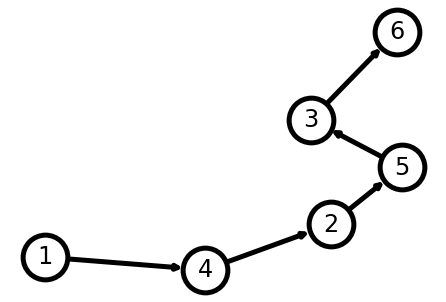

In [9]:
line.plot(seed=1)

### Simulation and report

Simply run the `simulate` method, setting the simulation run time.

This method generates the simulation report at the `report` property.

In [10]:
line.simulate(time=1000)
line.report

our_source report
        -----------------
        Model type       :  Source
        Items processed  :  54
        Time processing  :  767.59 (76.34%)
        Time blocked     :  0.00 (0.00%)
        Time broken      :  237.96 (23.66%)
        
        first_machine report
        --------------------
        Model type       :  Machine
        Items processed  :  51
        Time starved     :  8.07 (0.81%)
        Time processing  :  644.82 (64.48%)
        Time blocked     :  0.00 (0.00%)
        Time broken      :  347.11 (34.71%)
        
        second_machine report
        ---------------------
        Model type       :  Machine
        Items processed  :  0
        Time starved     :  828.58 (82.86%)
        Time processing  :  0.00 (0.00%)
        Time blocked     :  0.00 (0.00%)
        Time broken      :  171.42 (17.14%)

The `Line`'s `report` is made up of each of its `Model`'s `report`. You can access them individually.

Notice that the `Model` name is now an attribute of the `Line`.

In [11]:
line.our_source.report

Model type,Source,
Items processed,54,
Time processing,767.59,76.34%
Time blocked,0.00,0.00%
Time broken,237.96,23.66%


Some examples of properties generated after the simulation:

In [12]:
line.first_machine.items_processed

51

In [13]:
line.buffer1.content

2

In [14]:
line.second_machine.output_buffer

'sink'

In [15]:
line.our_source.processing_time

Exponential(mean=10, min=5)

Deep dive into some of their stats

- `Line`
    - `Model`
        - `Stats`
            - `total`
            - `values`
            - `len`
            - `max`
            - `min`
            - `mean`
            - `percentile()`
            - `histogram()`
            - `boxplot()`

In [16]:
line.first_machine.time_starved

Stats(total=8.067516695471241, values=[8.067516695471241])

In [17]:
line.first_machine.time_starved.max

8.067516695471241

In [18]:
line.our_source.time_processing.percentile(0.5)

5.045025356070351